# A small test of the GeoNet FDSN web service using ObsPy
This is using a local instance of the service and mock data.  See https://github.com/GeoNet/collect for more info.  I am running these notebooks via Docker using the command "docker run -v $(pwd):/home/jovyan/work --network host -it crleblanc/obspy-notebook:latest".  This pulls the Docker container and mounts the current working directory on the host as the current working directory on the guest.

Base URL: http://localhost:8080
Request Headers: {u'User-Agent': u'ObsPy 1.0.2 (Linux-4.4.0-31-generic-x86_64-with-debian-8.6, Python 2.7.12)'}



Uncompressing gzipped response for http://localhost:8080/fdsnws/event/1/application.wadlUncompressing gzipped response for http://localhost:8080/fdsnws/event/1/contributorsUncompressing gzipped response for http://localhost:8080/fdsnws/event/1/catalogs


Downloaded http://localhost:8080/fdsnws/event/1/application.wadl with HTTP code: 200Downloaded http://localhost:8080/fdsnws/event/1/contributors with HTTP code: 200

Downloaded http://localhost:8080/fdsnws/event/1/catalogs with HTTP code: 200
Downloaded http://localhost:8080/fdsnws/dataselect/1/application.wadl with HTTP code: 200
Downloaded http://localhost:8080/fdsnws/station/1/application.wadl with HTTP code: 200
Discovered event service
Discovered dataselect service
Discovered station service
Storing discovered services in cache.
Uncompressing gzipped response for http://localhost:8080/f

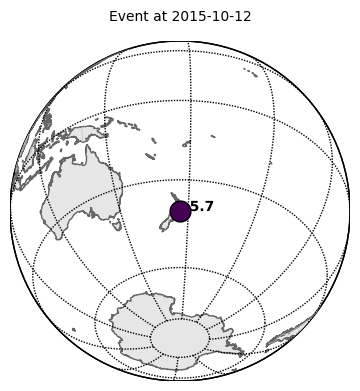

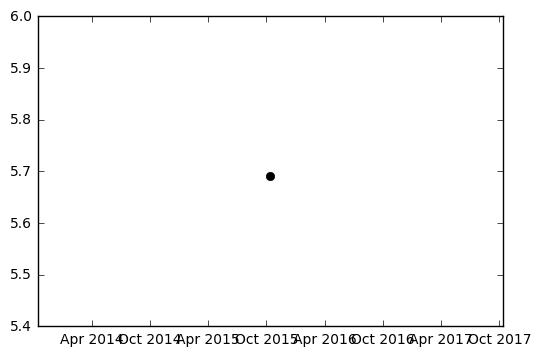

In [1]:
# Testing our FDSN server - events
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import datetime

geonetclient=Client('http://localhost:8080', debug=True)
events = geonetclient.get_events(starttime=UTCDateTime("2015-10-10T00:00:00"))
print '\n\n\n', events

events.plot(projection='ortho')

for event in events:
    t=event.origins[0].time
    time = t.datetime
    mag=event.magnitudes[0].mag
    plt.plot(time,mag,'ko')
plt.show()

In [2]:
# Testing the station info, should return stationxml (or some Python equiv)

st = UTCDateTime("2015-10-10T00:00:00")
et = UTCDateTime("2015-10-12T10:00:00")
inventory = geonetclient.get_stations(network="NZ", station="*", starttime=st, endtime=et)
print '\n\ninventory:', inventory

Downloaded http://localhost:8080/fdsnws/station/1/query?starttime=2015-10-10T00%3A00%3A00.000000&station=%2A&network=NZ&endtime=2015-10-12T10%3A00%3A00.000000&format=xml with HTTP code: 200


inventory: Inventory created at 2017-01-16T03:54:17.000000Z
	Sending institution: SeisComP3 (WEL(GNS_Secondary))
	Contains:
		Networks (1):
			NZ
		Stations (599):
			NZ.ABAZ (Army Bay)
			NZ.ADCS (Ashburton District Council)
			NZ.AKCZ (Akaroa Harbour)
			NZ.AKSS (Akaroa School)
			NZ.AKUS (Auckland University School of Engineering)
			NZ.ALRZ (Allen Road)
			NZ.AMBC (Amberley HDC)
			NZ.AMCZ (Amberley)
			NZ.ANWZ (Angora Road)
			NZ.APPS (Arthurs Pass Police Station)
			NZ.APZ (The Paps)
			NZ.ARAZ (Aratiatia Landcorp Farm)
			NZ.ARCZ (Arundel)
			NZ.ARHZ (Aropaoanui)
			NZ.ARKS (Wainuiomata Arakura School)
			NZ.ARPS (Arnold River Power Station)
			NZ.ASHS (Ashley School)
			NZ.AUCT (Auckland)
			NZ.AVIO (Aviemore)
			NZ.AWAZ (Awhitu Peninsula)
			NZ.BB1 (Mount Joyce, David Glacier, Antarctica)

Base URL: http://localhost:8080
Request Headers: {u'User-Agent': u'ObsPy 1.0.2 (Linux-4.4.0-31-generic-x86_64-with-debian-8.6, Python 2.7.12)'}
Loading discovered services from cache.
Downloaded http://localhost:8080/fdsnws/dataselect/1/query?network=NZ&station=TDHS&location=20&starttime=2016-09-01T16%3A37%3A00.000000&endtime=2016-09-01T16%3A42%3A00.000000&channel=%3FN%3F with HTTP code: 200
Downloaded http://localhost:8080/fdsnws/station/1/query?network=NZ&format=xml&level=response&station=TDHS&location=20&starttime=2016-09-01T16%3A36%3A50.011986&endtime=2016-09-01T16%3A42%3A01.851986&channel=BN2 with HTTP code: 200
Downloaded http://localhost:8080/fdsnws/station/1/query?network=NZ&format=xml&level=response&station=TDHS&location=20&starttime=2016-09-01T16%3A36%3A51.051896&endtime=2016-09-01T16%3A42%3A05.151896&channel=BN1 with HTTP code: 200
Downloaded http://localhost:8080/fdsnws/station/1/query?network=NZ&format=xml&level=response&station=TDHS&location=20&starttime=2016-09-01T16%3A3

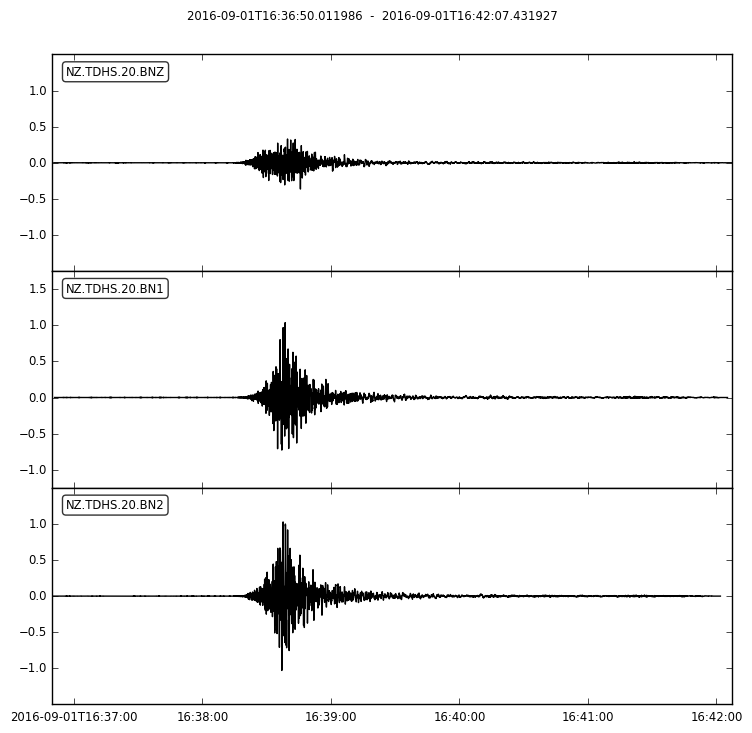

PGA (HN1) = 1.036797, PGA (HN2) = -1.029480, PGA (HNZ) = -0.363710 m/s/s 


In [3]:
# Testing the dataselect option, using Natalie's example

#geonetclient = Client("GEONET") # <- this works
geonetclient=Client('http://localhost:8080', debug=True) # this is using a reverse proxy so should work also
t = UTCDateTime("2016-09-01T16:37:00.000")
st = geonetclient.get_waveforms("NZ", "TDHS", "20", "?N?", t, t + 300, attach_response=True)
st.remove_response(output='ACC', pre_filt=(0.005, 0.006, 30.0, 35.0))

st.plot()
pga = st.max()
print 'PGA (HN1) = %f, PGA (HN2) = %f, PGA (HNZ) = %f m/s/s ' % (pga[0],pga[1],pga[2])
